# Lithos

### ***The develop branch is undergoing a lot of change. There may be breaking changes.***

Lithos is a simple plotting package written in Python and intend for scientific publications. There is a strong focus on plotting clustered data within groups. This is particularly useful for studies where many neurons are measured per mouse or subjects per location or repeated measures per subject. Data can be transformed (log10, inverse, etc) and/or aggregated (mean, median, circular mean, etc) within Lithos. You can also design plots, save the metadata and load the metadata for us in other plots making this comparable to GraphPad "magic" function.

Below is a quick tutorial of how to use Lithos. There are two main classes: `CategoricalPlot` for plotting means, medians, etc and `LinePlot` for plotting continuous variables like KDEs, scatterplots. Both of these classes have a number of methods that can be used to transform the data, aggregate it, design plots, save metadata, etc. There are a variety of ways you can format the plots to generate visual appealing plots that greatly simplifies what you would have to do in other packages.

## Installation
Install from github (need to have git installed)
```bash
pip install git+https://github.com/LarsHenrikNelson/Lithos.git
```

Install locally
1. Download the package
2. Open a shell or terminal
3. Activate your python environment
4. Type ```cd ```
5. Then drag and drop the folder into the terminal and hit enter
6. Then type ```pip install .``` and hit enter

## Example plots
Some example plots with synthetic data.

Import the plots and data generator (or use your own data).

In [1]:
from lithos.plotting import CategoricalPlot, LinePlot
from lithos.utils import create_synthetic_data

### Create some data
df is a dictionary but you could convert it to a Pandas DataFrame

In [2]:
df = create_synthetic_data(n_groups=2, n_subgroups=6, n_points=30)

### Formatting a plot
Show the plot with default settings. You may notice several differences in the default settings compared to Matplotlib and Seaborn. Labels are larger since and the y-axis (as well as the x-axis) end at the ticks.


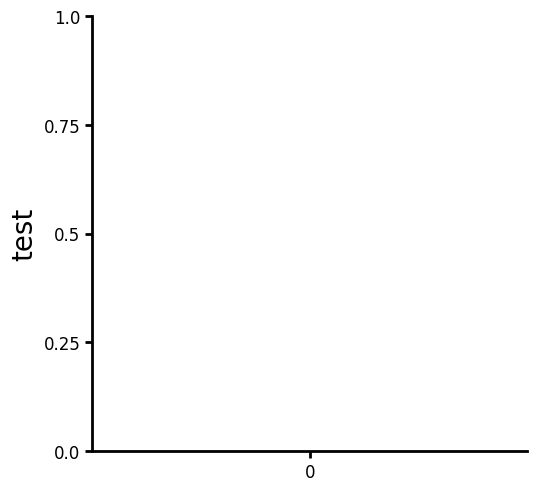

In [3]:
plot = (
    CategoricalPlot(data=df)
    .grouping(
        group="grouping_1",
        subgroup="grouping_2",
        group_spacing=0.9,
    )
    .plot_data(y="y", ylabel="test", title="")
    .plot()
)

Update labels, axis formating, etc.

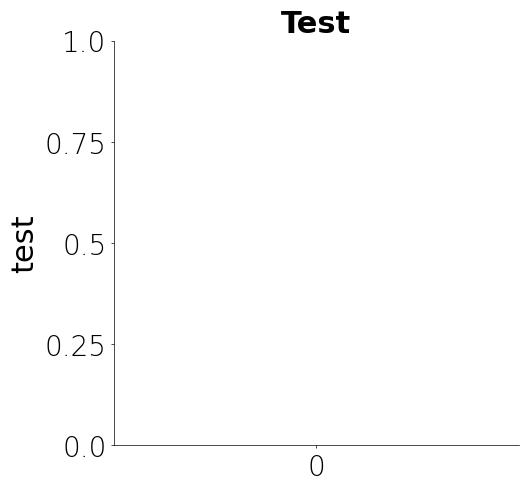

In [4]:
plot = (
    CategoricalPlot(data=df)
    .grouping(
        group="grouping_1",
        subgroup="grouping_2",
        group_spacing=0.9,
    )
    .labels(
        labelsize=22,
        titlesize=22,
        ticklabel_size=20,
        font="DejaVu Sans",
        label_fontweight="normal",
        tick_fontweight="light",
        title_fontweight="bold",
        xlabel_rotation="vertical",
        ytick_rotation="horizontal",
    )
    .axis_format(linewidth=0.5, tickwidth=0.5, ticklength=2)
    .plot_data(y="y", ylabel="test", title="Test")
)
plot.plot()

If you like the format then just save the metadata with name of your choice

In [5]:
plot.save_metadata("my_plot")

Then just load the metadata in the future and your plots will be formatted the same way without having to write the code again. You can also set the metadata directory to where ever you want incase you want to set your metadata directory to a folder that is synchronized with a cloud backupkup, like OneDrive or Dropbox. This way your metadata is accesible from where ever you want without forcing you to pay for yet another subscription. Additionally you can choose a folder that is shared with many people if you are working on a collaborative project. Just use the .set_metadata_dir() method on the plot object or use the set_metadata_directory() method from metadata_utils to change your metadata directory. Please note that neither of these methods directly connects to a cloud storage account so the folder must be on your computer.

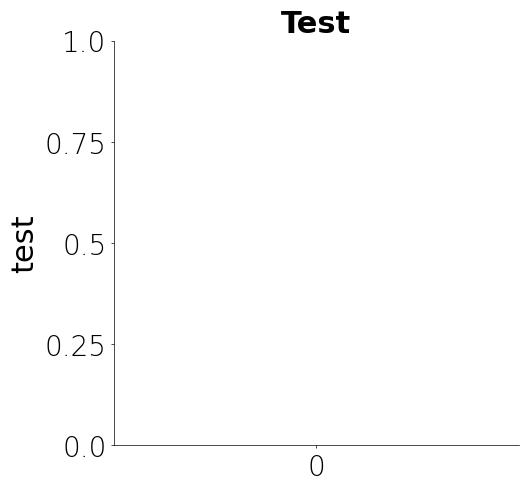

In [6]:
CategoricalPlot(data=df).load_metadata("my_plot").plot()

There are many parameters you can save. To inspect the plot format settings just check the plot_format attribute. plot_format is just a dictionary so attributes can be set directly or indirectly through function calls. More parameters will shown in future examples.

In [7]:
plot.plot_format

{'labels': {'labelsize': 22,
  'titlesize': 22,
  'font': 'DejaVu Sans',
  'ticklabel_size': 20,
  'title_fontweight': 'bold',
  'label_fontweight': 'normal',
  'tick_fontweight': 'light',
  'xlabel_rotation': 'vertical',
  'ylabel_rotation': 'vertical',
  'xtick_rotation': 'horizontal',
  'ytick_rotation': 'horizontal'},
 'axis': {'yscale': 'linear',
  'xscale': 'linear',
  'ylim': (None, None),
  'xlim': (None, None),
  'yaxis_lim': None,
  'xaxis_lim': None,
  'ydecimals': None,
  'xdecimals': None,
  'xunits': None,
  'yunits': None,
  'xformat': 'f',
  'yformat': 'f'},
 'axis_format': {'tickwidth': 0.5,
  'ticklength': 2,
  'linewidth': {'left': 0.5, 'bottom': 0.5, 'top': 0, 'right': 0},
  'minor_tickwidth': 1.5,
  'minor_ticklength': 2.5,
  'yminorticks': 0,
  'xminorticks': 0,
  'xsteps': (5, 0, 5),
  'ysteps': (5, 0, 5),
  'style': 'lithos'},
 'figure': {'gridspec_kw': None,
  'margins': 0.05,
  'aspect': 1.0,
  'figsize': None,
  'nrows': None,
  'ncols': None,
  'projection':

### Jitter + Summary plot
Below is jitter plot with several custom settings. 
* The metadata previously saved is loaded first.
* Plots can be layered by just adding a plot type method call. 
* Colors can set using a string color, None,a dictionary of colors with values in either the subgroup or group as the keys and colors as the values or as a colormap provided by colorcet with optionally restricting the number of values use in the 255 value colormap by adding an integer start and end as :start-end to the name of the color map. 
* The number of steps in the yaxis and the number of decimals to use set. Unlike matplotlib, Lithos always plots ticks at the end. This makes for more uniform plots and is visually appealing with the potential problem of too much white space. I generally do not have issues with too much white space.
* The optional unique_id is passed to jitter plot to plot nested data with individual marker types.
* Edgecolor defaults to "none" which means no edge color is used around the points. You can also pass the same types of arguments as color or you can  pass "color" to use the same colors as the color argument.
* For summary plot you can pass an aggregating function as string for a built-in aggregating function. The built-in aggregating function can be accessed by using ```CategoricalPlot.aggregating_funcs``` or ```LinePlot.aggregrating_funcs```. You can also pass you own custom function or callable.
* For summary plot you can pass an error function as string for a built-in error function. The built-in error function can be accessed by using ```CategoricalPlot.error_funcs``` or ```LinePlot.error_funcs```. You can also pass you own custom function or callable.

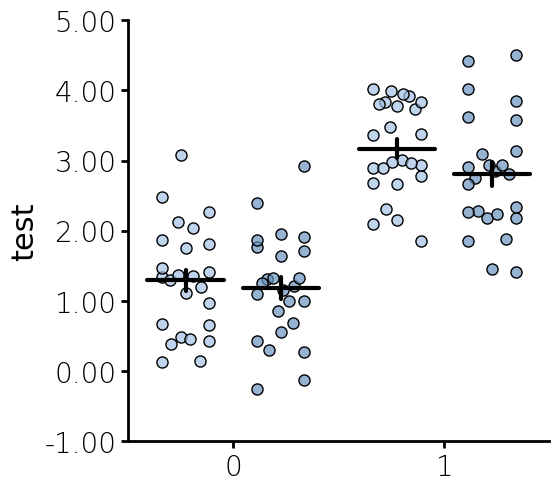

In [8]:
df = create_synthetic_data(
    n_groups=2, n_subgroups=2, n_unique_ids=5, n_points=5, distribution="gamma"
)
plot = (
    CategoricalPlot(data=df)
    .load_metadata("my_plot")
    .grouping(
        group="grouping_1",
        subgroup="grouping_2",
        group_spacing=0.9,
    )
    .jitter(
        # unique_id="unique_grouping",
        marker="o",
        color="blues:100-200",
        edgecolor="black",
        alpha=0.7,
        width=0.5,
        markersize=8,
        seed=30,
    )
    .summary(
        func="mean",
        capsize=0,
        capstyle="round",
        barwidth=0.8,
        err_func="sem",
        linewidth=3,
    )
    .axis_format(ysteps=7)  # Adding a custom number of steps to the y-axis
    .axis(ydecimals=2)  # Formatting the number of decimals to use.
    .plot_data(y="y", ylabel="test", title="")
    .plot()
)

### Jitteru + Violinplot
Below is a jitteru plot with a violin plot. Jitteru is my personal favorites since it really gives you a good look at how the data for each nested variable is distributed. The violin plot gives you an idea about the shape of the distribution. By combining the two you can see how each unique subject is contributing to the overall data. Here are several parameters I use below:
* Jitteru requires a unique_id
* For jitteru plot you can pass an aggregating function as string for a built-in aggregating function. The aggregrating function will plot a single point for the nested variable. The built-in aggregating functions can be accessed by using ```CategoricalPlot.aggregating_funcs``` or ```LinePlot.aggregrating_funcs```. You can also pass you own custom function or callable.
* Violin has several parameters you can set. Please note that the linewidth, color and alpha for showmeans and showmedians uses the specified edgecolor, edge_alpha and linewidth.
* Currently violin plot does not allow for passing a unique_id but will be implemented in the future. 



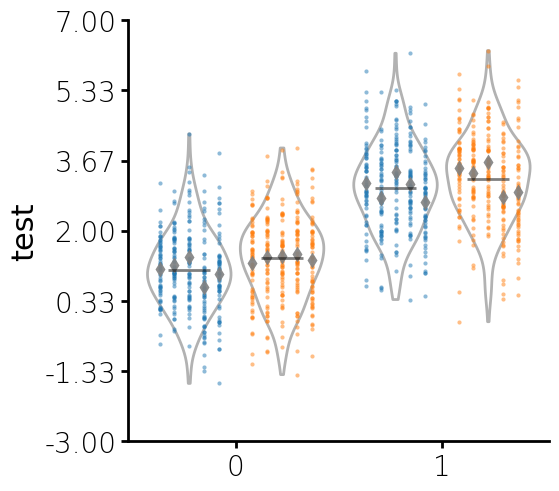

In [9]:
df = create_synthetic_data(n_groups=2, n_subgroups=2, n_unique_ids=5, n_points=60)
plot = (
    CategoricalPlot(data=df)
    .load_metadata("my_plot")
    .grouping(
        group="grouping_1",
        subgroup="grouping_2",
        group_spacing=0.9,
    )
    .jitteru(
        unique_id="unique_grouping",
        marker="o",
        edgecolor="none",
        alpha=0.5,
        width=0.8,
        markersize=3,
    )
    .jitteru(
        unique_id="unique_grouping",
        marker="d",
        color="grey",
        edgecolor="none",
        alpha=0.9,
        width=0.8,
        markersize=8,
        agg_func="mean",
    )
    .violin(
        facecolor="none",
        edgecolor="black",
        linewidth=2,
        width=0.9,
        showmeans=True,
        # showmedians=True, # you can add means or medians
    )
    .axis_format(ysteps=7)
    .axis(ydecimals=2)
    .plot_data(y="y", ylabel="test", title="")
    .plot()
)

### Boxplot
Boxplots are a great way to visualize the distribution of data. They can be used to compare different groups and identify outliers in your data. Currently there is no unique_id parameter for boxplot due to how they show data and the fact the plots get overly complicated to look at when there are many tiny boxes.

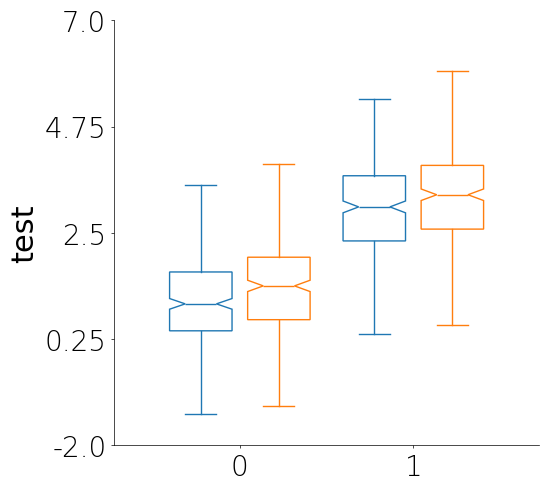

In [10]:
df = create_synthetic_data(n_groups=2, n_subgroups=2, n_unique_ids=5, n_points=60)
plot = (
    CategoricalPlot(data=df)
    .load_metadata("my_plot")
    .grouping(
        group="grouping_1",
        subgroup="grouping_2",
        group_spacing=0.9,
    )
    .box(
        facecolor="none",
        width=0.8,
        alpha=0.8,
        # showmeans=True, # You can shows means but it looks weird with show_ci
        show_ci=True,
    )
    .plot_data(y="y", ylabel="test", title="")
    .plot()
)

### KDE plot
Many functions have unique_id parameter which allows for nested aggregations and transforms. In the case of a KDE plot, you can first run KDE on the unique_groupings then aggregate the individual KDEs together to create a single KDE plot. When you pass an agg_func you can also pass an err_func. This allows you to plot the error in your KDE measure.
Additionally, you will notice that you can truncate the axis limits by passing a tuple that goes (number of ticks, start, end) to control the ticks that are displayed on each axis. Note that start and end follow python indexing so that start is zero indexe and end is not inclusive. 

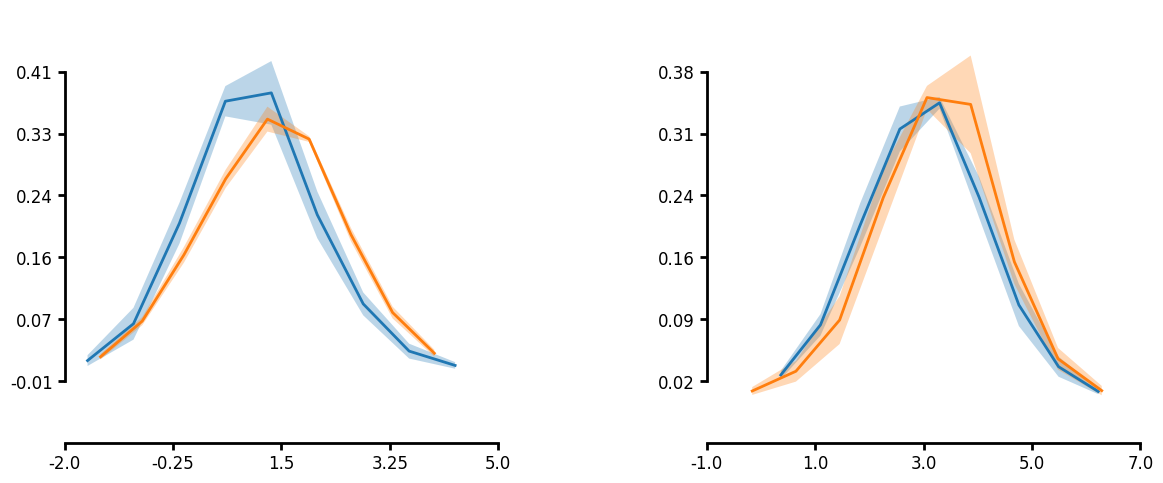

In [11]:
df = create_synthetic_data(n_groups=2, n_subgroups=2, n_unique_ids=5, n_points=60)
plot = (
    LinePlot(data=df)
    .grouping(group="grouping_1", subgroup="grouping_2", facet=True)
    .kde(
        unique_id="unique_grouping",
        agg_func="mean",
        err_func="sem",
        fill_between=True,
        linewidth=2,
        fillalpha=0.3,
    )
    .plot_data(x="y")
    .axis_format(ysteps=(8, 1, 7))
    .axis(ydecimals=2)
    .figure(ncols=2)
    .plot()
)

### ECDF plot
Similar to the KDE, you can pass a unique_id to the ECDF. In the case of the plot below I do not pass an aggregate function and you can see that the individual lines for each unique_group are plotted.
Additionally you will notice that you can specify two different axis limits to control the range of values displayed on each axis and control the range of the ticks thus creating a truncated axis with the plot data "floating" which is more visually appealing to some. Here are several parameters this plots uses:
* You can easily add minorticks by specifying more than 0 minor ticks.
* Minorticks can be formatted similarily to the main ticks by specifying the minor_tickwidth and minor_ticklength parameters.
* Major ticks can be formatted by tickwidth and ticklength.



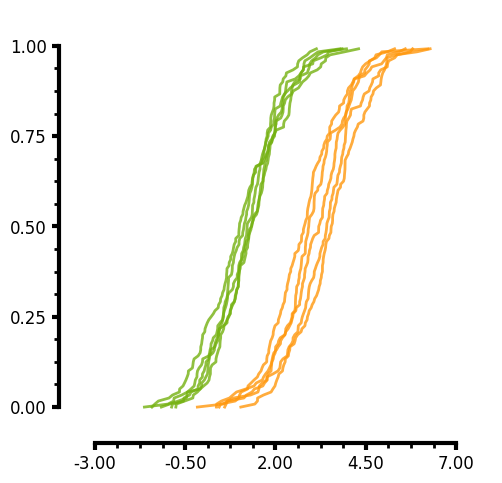

In [12]:
df = create_synthetic_data(n_groups=2, n_subgroups=2, n_unique_ids=5, n_points=60)
plot = (
    LinePlot(data=df)
    .grouping(group="grouping_1")
    .ecdf(
        linecolor="rainbow:100-200",
        linealpha=0.8,
        agg_func=None,
        err_func=None,
        unique_id="unique_grouping",
        fill_between=True,
    )
    .plot_data(y="y")
    .figure(ncols=2)
    .axis(
        ylim=(-0.1, 1.1),
        yaxis_lim=(0.0, 1.0),
        xlim=(-4, 8),
        xaxis_lim=(-3, 7),
        ydecimals=2,
        xdecimals=2,
    )
    .axis_format(
        linewidth=3,
        tickwidth=3,
        xminorticks=3,
        yminorticks=3,
        minor_ticklength=3.5,
        minor_tickwidth=2,
    )
    .plot()
)

### Aggline
Aggline allows you to aggregate points before plotting the data. This is useful when you have timeseries or distance data that you want to aggregate the y values at discrete times or distances. Here are several parameters this plots uses:
* If you like the default the axis style but just want to format the font and size of the labels then just pass style as "default" to the axis_format method. This will use the default axis style, which in this case is the Matplotlib default. The only settings that do not get ignore by the default style are the decimal settings.

c:\Users\nelso\Lithos\lithos\lithos\plotting\processing.py:671: FutureWarning: The provided callable <function mean at 0x000001A7F4694D60> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  data.groupby(y, new_levels, sort=sort).agg(get_transform(func)).reset_index()
c:\Users\nelso\Lithos\lithos\lithos\plotting\processing.py:692: FutureWarning: The provided callable <function mean at 0x000001A7F4694D60> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  .agg(get_transform(func))


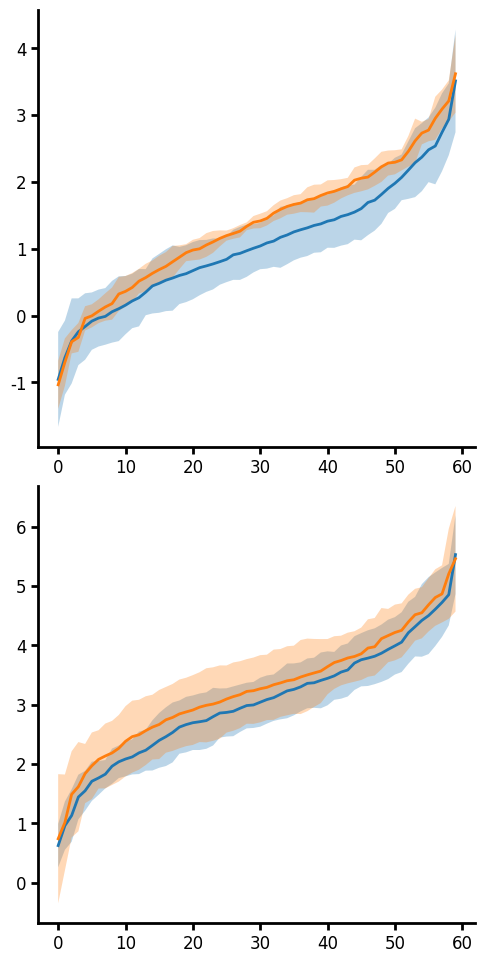

In [13]:
df = create_synthetic_data(n_groups=2, n_subgroups=2, n_unique_ids=5, n_points=60)
plot = (
    LinePlot(data=df)
    .grouping(group="grouping_1", subgroup="grouping_2", facet=True)
    .aggline(
        unique_id="unique_grouping",
        agg_func="mean",
        fill_between=True,
        linewidth=2,
        fillalpha=0.3,
        err_func="ci",
    )
    .axis(ydecimals=-1, xdecimals=-1)
    .axis_format(style="default")
    .plot_data(y="y", x="x")
    .plot()
)